In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
pre_season=pd.read_csv("C:/Users/Jang/Desktop/python/Data/야구/Pre_Season_Batter.csv")
regular=pd.read_csv("C:/Users/Jang/Desktop/python/Data/야구/Regular_Season_Batter.csv")
regular_Day=pd.read_csv("C:/Users/Jang/Desktop/python/Data/야구/Regular_Season_Batter_Day_by_Day_b4.csv")
sub=pd.read_csv("C:/Users/Jang/Desktop/python/Data/야구/submission.csv")

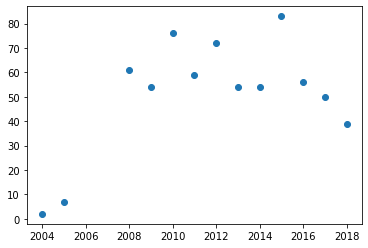

In [7]:
plt.scatter(regular.loc[regular['batter_name']=='박석민']['year'],regular[regular['batter_name']=='박석민']['BB'])

<AxesSubplot:xlabel='year'>

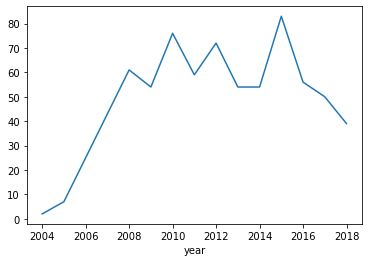

In [9]:
regular.loc[regular['batter_name']=='박석민'].groupby('year')['BB'].mean().plot()

0.42406761190587683


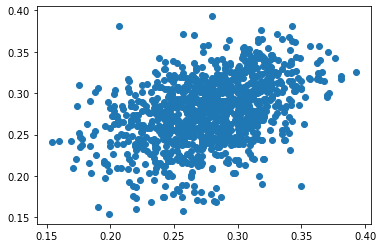

In [37]:
var='avg'
X=[]
y=[]
regular1=regular.loc[regular["AB"]>=100]
for name in regular1['batter_name'].unique():
    a=regular1.loc[regular1['batter_name']==name,]
    k=[]
    for i in a['year'].unique():
        if(a['year']==i+1).sum()>0:
        
            k.append(i)
    for i in k:
        X.append(a.loc[a['year']==i,var,].iloc[0])
        y.append(a.loc[a['year']==i+1,var,].iloc[0])
plt.scatter(X,y)
print(pd.Series(X).corr(pd.Series(y)))

X축은 해당년도 Y축은 다음년도

0.6537531676446489


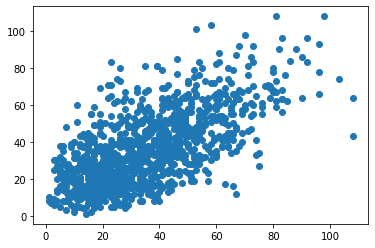

In [36]:
var='BB'
X=[]
y=[]
regular1=regular.loc[regular["AB"]>=100]
for name in regular1['batter_name'].unique():
    a=regular1.loc[regular1['batter_name']==name,]
    k=[]
    for i in a['year'].unique():
        if(a['year']==i+1).sum()>0:
        
            k.append(i)
    for i in k:
        X.append(a.loc[a['year']==i,var,].iloc[0])
        y.append(a.loc[a['year']==i+1,var,].iloc[0])
plt.scatter(X,y)
print(pd.Series(X).corr(pd.Series(y)))

In [52]:
def get_corr(var):
  
    X=[]
    y=[]
    regular1=regular.loc[regular["AB"]>=100]
    for name in regular1['batter_name'].unique():
        a=regular1.loc[regular1['batter_name']==name,]
        k=[]
        for i in a['year'].unique():
            if(a['year']==i+1).sum()>0:

                k.append(i)
        for i in k:
            X.append(a.loc[a['year']==i,var,].iloc[0])
            y.append(a.loc[a['year']==i+1,var,].iloc[0])
    
    return(pd.Series(X).corr(pd.Series(y)))

In [44]:
get_corr("AB")

AB
0.5345220495165055


In [49]:
regular.columns

Index(['batter_id', 'batter_name', 'year', 'team', 'avg', 'G', 'AB', 'R', 'H',
       '2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP',
       'SLG', 'OBP', 'E', 'height/weight', 'year_born', 'position', 'career',
       'starting_salary', 'OPS'],
      dtype='object')

In [55]:
agg={}
for i in ['avg', 'G', 'AB', 'R', 'H','2B', '3B', 'HR', 'TB', 'RBI', 'SB', 'CS', 'BB', 'HBP', 'SO', 'GDP','SLG', 'OBP', 'E']:
    agg[i]=get_corr(i)



In [54]:
agg

{'G': 0.2827945222858424,
 'AB': 0.5345220495165055,
 'R': 0.6226214086043601,
 'H': 0.5780431760833786,
 '2B': 0.5150624616599283,
 '3B': 0.44087969523833104,
 'HR': 0.7412597496536675,
 'TB': 0.6343944721859059,
 'RBI': 0.651947415097796,
 'SB': 0.7260764196191684,
 'CS': 0.5732143724546752,
 'BB': 0.6537531676446489,
 'HBP': 0.5627917256433479,
 'SO': 0.5664029028016614,
 'GDP': 0.4902224105414654,
 'SLG': 0.6139336781007896,
 'OBP': 0.5452616730047514,
 'E': 0.6225595423969393}

신뢰성 높은 지표 : 홈런, 삼진, 볼넷, 장타율
신뢰성 낮은 지표 : 3루타, 2루타